In [1]:
import data_preprocessing as dp
import neural_network_library as nnl
import numpy as np
import matplotlib.pyplot as plt

# set the random seed
np.random.seed(42)

# Loading Data after preprocessing

In [2]:
X_train, X_val, y_train, y_val, X_test, y_test = dp.preprocess_data()

# Training Model 3 

In [8]:
# Model configuration
model = nnl.Sequential([
    nnl.Linear(11, 256),
    nnl.ReLU(),
    nnl.Linear(256, 128),
    nnl.ReLU(),
    nnl.Linear(128, 1),
])
loss = nnl.MseLoss()

# Training parameters
learning_rate = 0.0001
batch_size = 512
n_epochs = 200
patience = 3
best_val_loss = np.inf
patience_counter = 0
train_losses, val_losses = [], []
best_model_weights = None

# Training loop with early stopping
for epoch in range(n_epochs):
    # Shuffle training data
    shuffled_idx = np.random.permutation(X_train.shape[0])
    X_shuffled = X_train[shuffled_idx]
    y_shuffled = y_train[shuffled_idx]
    epoch_losses = []

    # loop through data in batches
    for step in range(0, X_shuffled.shape[0], batch_size):
        end_idx = step + batch_size
        X_batch = X_shuffled[step:end_idx]
        y_batch = y_shuffled[step:end_idx]
        
        # Forward pass
        y_pred = model.forward(X_batch)
        batch_loss = loss.forward(y_pred, y_batch)

        # Backward pass
        grad = loss.backward()
        model.backward(grad)
        
        # Update weights
        for layer in model.layers:
            if isinstance(layer, nnl.Linear):
                layer.weights -= learning_rate * layer.grad_weights
                layer.bias -= learning_rate * layer.grad_bias

        epoch_losses.append(batch_loss)
    
    # Validation
    val_pred = model.forward(X_val)
    val_loss = loss.forward(val_pred, y_val)
    val_losses.append(val_loss)

    # Early stopping check added rounding since the loss is not always decreasing 
    # and doesn't change loss very much during testing stops training must faster
    # if not training takes a long time around 60ish epochs for roughly the same result
    if val_loss < best_val_loss: #round(val_loss, 3) < round(best_val_loss, 3):
        best_val_loss = val_loss
        patience_counter = 0
        model.save(r'Models\model3.npz')
    else:
        patience_counter += 1

    avg_train_loss = np.mean(epoch_losses)
    train_losses.append(avg_train_loss)
    val_losses.append(val_loss)  

    if patience_counter >= patience:
        print(f'Early stopping at epoch {epoch}')
        break
    
    print(f"Epoch {epoch+1} | Train: {avg_train_loss:.4f} | Val: {val_loss:.4f} | Patience: {patience_counter}/{patience}")


Epoch 1 | Train: 7.8403 | Val: 2.0250 | Patience: 0/3
Epoch 2 | Train: 1.0449 | Val: 0.9778 | Patience: 0/3
Epoch 3 | Train: 0.7321 | Val: 0.8213 | Patience: 0/3
Epoch 4 | Train: 0.5921 | Val: 0.6700 | Patience: 0/3
Epoch 5 | Train: 0.5043 | Val: 0.5825 | Patience: 0/3
Epoch 6 | Train: 0.4481 | Val: 0.5360 | Patience: 0/3
Epoch 7 | Train: 0.4153 | Val: 0.4843 | Patience: 0/3
Epoch 8 | Train: 0.3849 | Val: 0.4497 | Patience: 0/3
Epoch 9 | Train: 0.3626 | Val: 0.4307 | Patience: 0/3
Epoch 10 | Train: 0.3449 | Val: 0.4028 | Patience: 0/3
Epoch 11 | Train: 0.3304 | Val: 0.3822 | Patience: 0/3
Epoch 12 | Train: 0.3179 | Val: 0.3642 | Patience: 0/3
Epoch 13 | Train: 0.3076 | Val: 0.3496 | Patience: 0/3
Epoch 14 | Train: 0.2986 | Val: 0.3369 | Patience: 0/3
Epoch 15 | Train: 0.2910 | Val: 0.3246 | Patience: 0/3
Epoch 16 | Train: 0.2846 | Val: 0.3157 | Patience: 0/3
Epoch 17 | Train: 0.2793 | Val: 0.3092 | Patience: 0/3
Epoch 18 | Train: 0.2746 | Val: 0.3025 | Patience: 0/3
Epoch 19 | Train: 0

In [9]:
# Test the model after training
test_pred = np.expm1(model.forward(X_test).flatten())
rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(test_pred))**2))
print(f"\nTest RMSLE: {rmsle:.4f}")


Test RMSLE: 0.4767


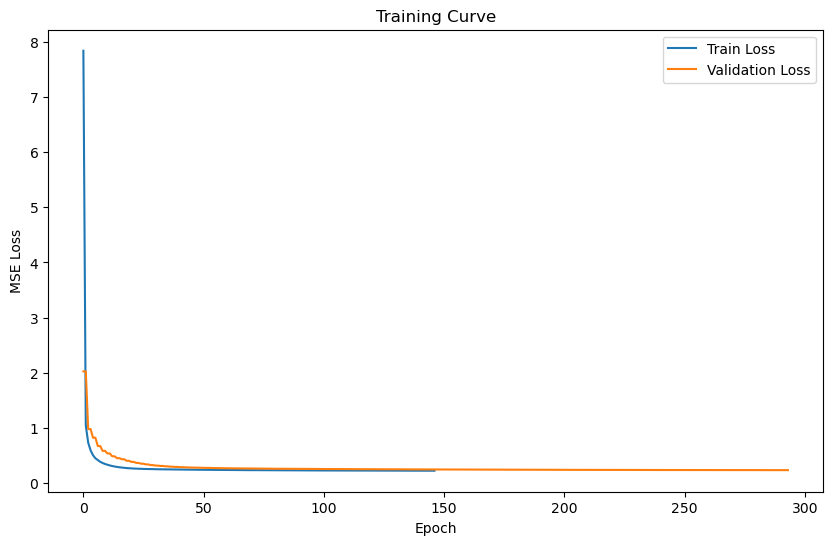

In [10]:
# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('Training Curve')
plt.legend()
plt.savefig(r'Plots\model3_training_curve.png')
plt.show()


# Load Model 3 Weights

In [12]:
# load model 3 for quick testing
model3 = nnl.Sequential([
     nnl.Linear(11, 256),
    nnl.ReLU(),
    nnl.Linear(256, 128),
    nnl.ReLU(),
    nnl.Linear(128, 1),
])

model3.load(r'Models\model3.npz')

test_pred = np.expm1(model3.forward(X_test).flatten())
rmsle = np.sqrt(np.mean((np.log1p(y_test) - np.log1p(test_pred))**2))
print(f"\nTest RMSLE: {rmsle:.4f}")

Weights loaded from Models\model3.npz

Test RMSLE: 0.4769
